In [3]:
# this notebook is for data cleansing only

# standard libraries
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import os

# plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# get the datetime library for date & time calcs
from datetime import datetime, timedelta

In [4]:
# load the the main data sets
activeData = os.path.normpath("C:/Users/n846490/Documents/DataScience/CSVs/checkingVintageRaw.csv")
vintageData = pd.read_csv(activeData)

In [5]:
# get a view of the data and headers
vintageData.head()

,H1424_IDCENT,H1424_IDPROD,H1424_IDCONTRN,H1424_FECCONTR,H1424_FECBAJA,H1424_TIPOPERS,H1424_CODPERS,H1424_CDCANAL,Category,H9776_NOMPROV1,H1451_EDADPER,Cust_Start
0,1,113,12,29NOV1989,20SEP2016,F,354668,RED,MORTGAGE,PA,67,NaN
1,1,113,30,30SEP1996,17SEP2012,F,132166,RED,MORTGAGE,PA,71,09/19/1996
2,1,113,37,26MAR1999,14DEC2010,F,5272647,RED,MORTGAGE,PA,56,03/19/1999
3,1,113,40,02NOV2001,27DEC2007,F,131869,RED,MORTGAGE,PA,56,NaN
4,1,113,40,02NOV2001,27DEC2007,F,1019639,RED,MORTGAGE,PA,60,04/27/2013


In [6]:
# need to change the column names to make more sense
# do this with mapping

newNames = {'H1424_IDCENT': 'CostCenter', 'H1424_IDPROD':'ProductType', 'H1424_IDCONTRN':'ContractNumber', 'H1424_FECCONTR':'DateOpened', 'H1424_FECBAJA':'DateClosed', 'H1424_TIPOPERS':'PersonType', 'H1424_CODPERS':'PersonCode', 'H1424_CDCANAL':'Channel', 'Category':'Category', 'H9776_NOMPROV1':'State', 'H1451_EDADPER':'CustomerAge', 'Cust_Start':'CustomerStart'}

vintageData.rename(columns=newNames, inplace=True)

# get a view of the data and headers
vintageData.head()

,CostCenter,ProductType,ContractNumber,DateOpened,DateClosed,PersonType,PersonCode,Channel,Category,State,CustomerAge,CustomerStart
0,1,113,12,29NOV1989,20SEP2016,F,354668,RED,MORTGAGE,PA,67,NaN
1,1,113,30,30SEP1996,17SEP2012,F,132166,RED,MORTGAGE,PA,71,09/19/1996
2,1,113,37,26MAR1999,14DEC2010,F,5272647,RED,MORTGAGE,PA,56,03/19/1999
3,1,113,40,02NOV2001,27DEC2007,F,131869,RED,MORTGAGE,PA,56,NaN
4,1,113,40,02NOV2001,27DEC2007,F,1019639,RED,MORTGAGE,PA,60,04/27/2013


In [7]:
pd.options.display.float_format = '{:,.0f}'.format

vintageData.describe()

# 4,142,169 records

,CostCenter,ProductType,ContractNumber,PersonCode,CustomerAge
count,"4,142,169","4,142,169","4,142,169","4,142,169","4,142,169"
mean,"1,115",315,"18,710","4,360,043",52
std,"1,568",128,"87,795","5,635,113",20
min,1,103,1,14,0
25%,240,300,"1,385","1,032,563",36
50%,585,300,"5,227","2,632,897",53
75%,985,300,"9,812","5,633,770",66
max,"9,995",819,"1,013,482","29,173,949",999


In [8]:
# look at the unique values in products
# need to remove the internal ones if it exists

vintageData['Category'].unique()

array(['MORTGAGE', 'HOME EQUITY', 'LOC', 'ODLOC', 'LOC - Personal',
       'BUSINESS ODLOC', 'COMMERCIAL LOAN', 'LOAN - Personal', 'LOAN',
       'AUTO', 'LOAN - Savings Secured', 'CHECKING', 'OTHER',
       'MONEY MARKET', 'BUSINESS CHECKING', 'SAVINGS',
       'BUSINESS MONEY MARKET', 'INTERNAL', 'CDIRA', 'CREDIT CARD',
       'INVESTMENTS', 'ESCROW STANDALONE SAVINGS', 'SAFE BOX',
       'Commercial IOLTA', 'BUSINESS CD', 'ESCROW SAVINGS', 'OTHER LOAN',
       'BUSINESS SAVINGS', 'Credit Card'], dtype=object)

In [9]:
# remove the category INTERNAL
vintageData = vintageData[vintageData.Category != 'INTERNAL']

#check for removal

vintageData['Category'].unique()

array(['MORTGAGE', 'HOME EQUITY', 'LOC', 'ODLOC', 'LOC - Personal',
       'BUSINESS ODLOC', 'COMMERCIAL LOAN', 'LOAN - Personal', 'LOAN',
       'AUTO', 'LOAN - Savings Secured', 'CHECKING', 'OTHER',
       'MONEY MARKET', 'BUSINESS CHECKING', 'SAVINGS',
       'BUSINESS MONEY MARKET', 'CDIRA', 'CREDIT CARD', 'INVESTMENTS',
       'ESCROW STANDALONE SAVINGS', 'SAFE BOX', 'Commercial IOLTA',
       'BUSINESS CD', 'ESCROW SAVINGS', 'OTHER LOAN', 'BUSINESS SAVINGS',
       'Credit Card'], dtype=object)

In [10]:
# look at the age buckets

ageCounts = vintageData['CustomerAge'].value_counts()

#get the top 20
ageCounts[:20]

59    82777
58    82611
60    82103
57    81900
56    81857
55    81589
54    79997
53    79425
62    77859
61    77774
69    77716
52    76771
63    76120
64    75680
65    73910
51    73444
68    72260
67    71562
66    70925
50    70322
Name: CustomerAge, dtype: int64

In [11]:
# check on unique customer counts
# this gives good output, but not 100% that they are unique
# grouped = vintageData['PersonCode'].groupby(vintageData['Category'])
# grouped.count()

# try an alternative method to get a clean table

vintageData.groupby('Category').agg({'PersonCode' : pd.Series.count})

,PersonCode
Category,
AUTO,2025
BUSINESS CD,1294
BUSINESS CHECKING,120954
BUSINESS MONEY MARKET,34380
BUSINESS ODLOC,3089
BUSINESS SAVINGS,449
CDIRA,380880
CHECKING,1378745
COMMERCIAL LOAN,6733


In [12]:
# looking to get a count of distinct customer ids in the products
# df.groupby("date").agg({"duration": np.sum, "user_id": pd.Series.nunique})

vintageData.groupby('Category').agg({'PersonCode' : pd.Series.nunique})

,PersonCode
Category,
AUTO,1965
BUSINESS CD,787
BUSINESS CHECKING,65957
BUSINESS MONEY MARKET,24728
BUSINESS ODLOC,2930
BUSINESS SAVINGS,411
CDIRA,117133
CHECKING,931286
COMMERCIAL LOAN,3355


In [13]:
# get a count of the nulls in the CustomerStart date
# 222,719 nulls

vintageData['CustomerStart'].isnull().sum()

222719

In [14]:
vintageData['CustomerStart'].describe()

count        3918697
unique         15675
top       08/06/1982
freq           10158
Name: CustomerStart, dtype: object

In [ ]:
#checkingData.iloc[:,13] = pd.to_datetime(checkingData.iloc[:,12], format='%Y-%m-%d')

In [15]:
# set the reference date to Dec 15, 2016
end = datetime(2016,12,15).date()


In [16]:
# fill the end date with Dec 15
# this will be used to calculate customer tenure
vintageData['End_Date'] = end

In [17]:
vintageData.head()

,CostCenter,ProductType,ContractNumber,DateOpened,DateClosed,PersonType,PersonCode,Channel,Category,State,CustomerAge,CustomerStart,End_Date
0,1,113,12,29NOV1989,20SEP2016,F,354668,RED,MORTGAGE,PA,67,NaN,2016-12-15
1,1,113,30,30SEP1996,17SEP2012,F,132166,RED,MORTGAGE,PA,71,09/19/1996,2016-12-15
2,1,113,37,26MAR1999,14DEC2010,F,5272647,RED,MORTGAGE,PA,56,03/19/1999,2016-12-15
3,1,113,40,02NOV2001,27DEC2007,F,131869,RED,MORTGAGE,PA,56,NaN,2016-12-15
4,1,113,40,02NOV2001,27DEC2007,F,1019639,RED,MORTGAGE,PA,60,04/27/2013,2016-12-15


In [18]:
# check the various formats of the data
# most dates are of type object

vintageData.dtypes

CostCenter         int64
ProductType        int64
ContractNumber     int64
DateOpened        object
DateClosed        object
PersonType        object
PersonCode         int64
Channel           object
Category          object
State             object
CustomerAge        int64
CustomerStart     object
End_Date          object
dtype: object

In [19]:
# first convert the End_Dates that were just created

vintageData['End_Date'] = pd.to_datetime(vintageData['End_Date'], format='%Y-%m-%d')

# and then check them
# End_Date convertd to datetime64[ns]

vintageData.dtypes

CostCenter                 int64
ProductType                int64
ContractNumber             int64
DateOpened                object
DateClosed                object
PersonType                object
PersonCode                 int64
Channel                   object
Category                  object
State                     object
CustomerAge                int64
CustomerStart             object
End_Date          datetime64[ns]
dtype: object

In [22]:
#get a sample of the data
# x = vintageData.iloc[0,3]
# x

# next do the date opened

# %d%b%Y:%H:%M:%S.%f

vintageData['DateOpened'] = pd.to_datetime(vintageData['DateOpened'], format='%d%b%Y')

vintageData.dtypes

# DateOpened convertd to datetime64[ns]

CostCenter                 int64
ProductType                int64
ContractNumber             int64
DateOpened        datetime64[ns]
DateClosed                object
PersonType                object
PersonCode                 int64
Channel                   object
Category                  object
State                     object
CustomerAge                int64
CustomerStart             object
End_Date          datetime64[ns]
dtype: object

In [23]:
# need to check the format of the DateClosed
x = vintageData.iloc[0,4]
x

'20SEP2016'

In [24]:
# need to create a function for observed or not
# if the date in date closed == 31Dec1999, then set observed = 0

def observed(date):
    if date == '31DEC9999':
        return int(0)
    else:
        return int(1)

In [25]:
# now apply the function to create a new column called observed

vintageData['Observed'] = vintageData['DateClosed'].apply(observed)

In [26]:
# get  view of observed
# split looks realistic 2.47M 0's to 1.67M 1's

vintageData.groupby('Observed').agg({'Observed' : pd.Series.count})

,Observed
Observed,
0,2472398
1,1669018


In [27]:
vintageData.head(20) # need 20 just to see how the 0's and 1's lined up

,CostCenter,ProductType,ContractNumber,DateOpened,DateClosed,PersonType,PersonCode,Channel,Category,State,CustomerAge,CustomerStart,End_Date,Observed
0,1,113,12,1989-11-29,20SEP2016,F,354668,RED,MORTGAGE,PA,67,NaN,2016-12-15,1
1,1,113,30,1996-09-30,17SEP2012,F,132166,RED,MORTGAGE,PA,71,09/19/1996,2016-12-15,1
2,1,113,37,1999-03-26,14DEC2010,F,5272647,RED,MORTGAGE,PA,56,03/19/1999,2016-12-15,1
3,1,113,40,2001-11-02,27DEC2007,F,131869,RED,MORTGAGE,PA,56,NaN,2016-12-15,1
4,1,113,40,2001-11-02,27DEC2007,F,1019639,RED,MORTGAGE,PA,60,04/27/2013,2016-12-15,1
5,1,113,46,2004-06-18,24MAY2012,F,1346577,RED,MORTGAGE,PA,67,05/02/2003,2016-12-15,1
6,1,113,110,2003-04-30,28JAN2013,F,142009,RED,MORTGAGE,PA,66,08/10/1994,2016-12-15,1
7,2,103,269,1987-02-21,31DEC9999,F,132926,RED,HOME EQUITY,PA,72,02/19/1987,2016-12-15,0
8,2,103,276,1987-07-29,31DEC9999,F,132913,RED,HOME EQUITY,PA,63,07/29/1987,2016-12-15,0
9,2,103,285,1988-11-14,31DEC9999,F,132958,RED,HOME EQUITY,PA,64,11/14/1988,2016-12-15,0


In [ ]:
######### DO NOT EXECUTE THIS CODE FOR EXAMPLE ONLY   #############

# midpoint of two date columns
df = pd.DataFrame({'a': ['5/1/2012 0:00', '4/1/2014 0:00'],
                   'b': ['4/1/2014 0:00', 'unknown']})
 
# make time data into Timestamp format
def try_totime(t):
    try:
        return pd.Timestamp(t)
    except:
        return np.nan
     
df['start'] = df.a.map(try_totime)
df['end'] = df.b.map(try_totime)
 
# generate midpoint time
# harder than it would seem...
df['time'] = df.start + (df.end - df.start)/2
 
df

In [28]:
# get mean and median date of customer start or a plot of counts by year
#df.groupby([df.index.date, 'action']).count().plot(kind='bar')
#vintageData.groupby(vintageData.index.CustomerStart['PersonCode']).count().plot(kind='bar')

# calculate the customer tenure
def try_convert(bad_date):
    
    try:

        return pd.to_datetime(bad_date, format='%m/%d/%Y')
    
    except:
        return np.nan

In [29]:
# need to check the format of the DateClosed
x = vintageData.iloc[0:5,11]
x

0           NaN
1    09/19/1996
2    03/19/1999
3           NaN
4    04/27/2013
Name: CustomerStart, dtype: object

In [30]:
#vintageData['CustTenure'] = vintageData[['CustomerStart','End_Date' ]].apply(try_tenure, axis = 1)

#vintageData['CustTenure'] = vintageData['End_Date'] - vintageData[CustomerStart'].days


vintageData['CleanCustStart'] = vintageData['CustomerStart'].apply(try_convert)

vintageData.head(6)

,CostCenter,ProductType,ContractNumber,DateOpened,DateClosed,PersonType,PersonCode,Channel,Category,State,CustomerAge,CustomerStart,End_Date,Observed,CleanCustStart
0,1,113,12,1989-11-29,20SEP2016,F,354668,RED,MORTGAGE,PA,67,NaN,2016-12-15,1,NaT
1,1,113,30,1996-09-30,17SEP2012,F,132166,RED,MORTGAGE,PA,71,09/19/1996,2016-12-15,1,1996-09-19
2,1,113,37,1999-03-26,14DEC2010,F,5272647,RED,MORTGAGE,PA,56,03/19/1999,2016-12-15,1,1999-03-19
3,1,113,40,2001-11-02,27DEC2007,F,131869,RED,MORTGAGE,PA,56,NaN,2016-12-15,1,NaT
4,1,113,40,2001-11-02,27DEC2007,F,1019639,RED,MORTGAGE,PA,60,04/27/2013,2016-12-15,1,2013-04-27
5,1,113,46,2004-06-18,24MAY2012,F,1346577,RED,MORTGAGE,PA,67,05/02/2003,2016-12-15,1,2003-05-02


In [31]:
vintageData.dtypes

# CleanCustStart converted to datetime64[ns]

CostCenter                 int64
ProductType                int64
ContractNumber             int64
DateOpened        datetime64[ns]
DateClosed                object
PersonType                object
PersonCode                 int64
Channel                   object
Category                  object
State                     object
CustomerAge                int64
CustomerStart             object
End_Date          datetime64[ns]
Observed                   int64
CleanCustStart    datetime64[ns]
dtype: object

In [32]:
# calculate the customer tenure

vintageData['CustTenure'] = vintageData['End_Date'] - vintageData['CleanCustStart']

vintageData.head(10)

,CostCenter,ProductType,ContractNumber,DateOpened,DateClosed,PersonType,PersonCode,Channel,Category,State,CustomerAge,CustomerStart,End_Date,Observed,CleanCustStart,CustTenure
0,1,113,12,1989-11-29,20SEP2016,F,354668,RED,MORTGAGE,PA,67,NaN,2016-12-15,1,NaT,NaT
1,1,113,30,1996-09-30,17SEP2012,F,132166,RED,MORTGAGE,PA,71,09/19/1996,2016-12-15,1,1996-09-19,7392 days
2,1,113,37,1999-03-26,14DEC2010,F,5272647,RED,MORTGAGE,PA,56,03/19/1999,2016-12-15,1,1999-03-19,6481 days
3,1,113,40,2001-11-02,27DEC2007,F,131869,RED,MORTGAGE,PA,56,NaN,2016-12-15,1,NaT,NaT
4,1,113,40,2001-11-02,27DEC2007,F,1019639,RED,MORTGAGE,PA,60,04/27/2013,2016-12-15,1,2013-04-27,1328 days
5,1,113,46,2004-06-18,24MAY2012,F,1346577,RED,MORTGAGE,PA,67,05/02/2003,2016-12-15,1,2003-05-02,4976 days
6,1,113,110,2003-04-30,28JAN2013,F,142009,RED,MORTGAGE,PA,66,08/10/1994,2016-12-15,1,1994-08-10,8163 days
7,2,103,269,1987-02-21,31DEC9999,F,132926,RED,HOME EQUITY,PA,72,02/19/1987,2016-12-15,0,1987-02-19,10892 days
8,2,103,276,1987-07-29,31DEC9999,F,132913,RED,HOME EQUITY,PA,63,07/29/1987,2016-12-15,0,1987-07-29,10732 days
9,2,103,285,1988-11-14,31DEC9999,F,132958,RED,HOME EQUITY,PA,64,11/14/1988,2016-12-15,0,1988-11-14,10258 days


In [33]:
# get the delta in a cleaner format

# CustTenure is in the format XXXX days
# CustTenure is converted to timedelta64[ns]

vintageData.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4141416 entries, 0 to 4142168
Data columns (total 16 columns):
CostCenter        int64
ProductType       int64
ContractNumber    int64
DateOpened        datetime64[ns]
DateClosed        object
PersonType        object
PersonCode        int64
Channel           object
Category          object
State             object
CustomerAge       int64
CustomerStart     object
End_Date          datetime64[ns]
Observed          int64
CleanCustStart    datetime64[ns]
CustTenure        timedelta64[ns]
dtypes: datetime64[ns](3), int64(6), object(6), timedelta64[ns](1)
memory usage: 537.1+ MB


In [34]:
vintageData['CustTenure'].describe()

count                      3916481
mean     4663 days 07:35:18.526401
std      4257 days 02:17:09.584267
min                2 days 00:00:00
25%              891 days 00:00:00
50%             3576 days 00:00:00
75%             7346 days 00:00:00
max            42352 days 00:00:00
Name: CustTenure, dtype: object

In [35]:
# this actually works to convert days to hours and then years
vintageData['CustYears'] = (vintageData['CustTenure'].astype('timedelta64[h]'))/(24*365)

In [36]:
vintageData.head()

# the head shows the column ['CustYears'] in proper form
# check the data type to ensure it is a float64

vintageData.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4141416 entries, 0 to 4142168
Data columns (total 17 columns):
CostCenter        int64
ProductType       int64
ContractNumber    int64
DateOpened        datetime64[ns]
DateClosed        object
PersonType        object
PersonCode        int64
Channel           object
Category          object
State             object
CustomerAge       int64
CustomerStart     object
End_Date          datetime64[ns]
Observed          int64
CleanCustStart    datetime64[ns]
CustTenure        timedelta64[ns]
CustYears         float64
dtypes: datetime64[ns](3), float64(1), int64(6), object(6), timedelta64[ns](1)
memory usage: 568.7+ MB


In [37]:
vintageData['CustYears'].describe()

C:\Users\n846490\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count   3,916,481
mean           13
std            12
min             0
25%           nan
50%           nan
75%           nan
max           116
Name: CustYears, dtype: float64

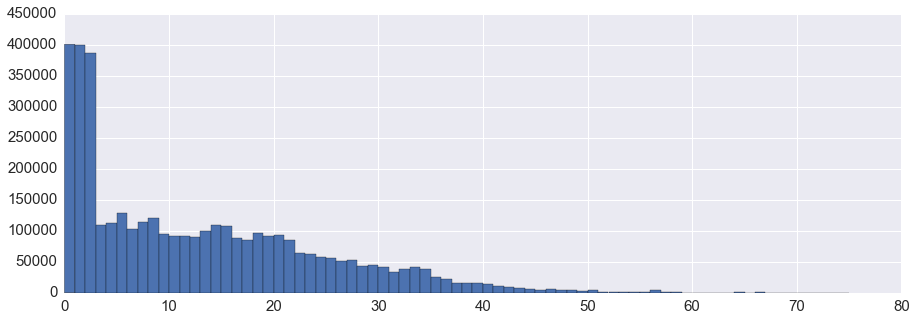

In [38]:
# try a histogram looks like there are many shorter tenured customers as expected

sns.set(font_scale=1.5) 
vintageData['CustYears'].hist(bins=75, range = [0,75], align = 'mid', figsize=(15,5))

In [39]:
# visualize the Categories

vintageData['Category'].astype('category')

0                 MORTGAGE
1                 MORTGAGE
2                 MORTGAGE
3                 MORTGAGE
4                 MORTGAGE
5                 MORTGAGE
6                 MORTGAGE
7              HOME EQUITY
8              HOME EQUITY
9              HOME EQUITY
10                     LOC
11             HOME EQUITY
12             HOME EQUITY
13             HOME EQUITY
14             HOME EQUITY
15             HOME EQUITY
16             HOME EQUITY
17             HOME EQUITY
18                   ODLOC
19                   ODLOC
20                   ODLOC
21             HOME EQUITY
22             HOME EQUITY
23             HOME EQUITY
24             HOME EQUITY
25             HOME EQUITY
26             HOME EQUITY
27                     LOC
28             HOME EQUITY
29             HOME EQUITY
                ...       
4142139        CREDIT CARD
4142140        CREDIT CARD
4142141        CREDIT CARD
4142142        CREDIT CARD
4142143        CREDIT CARD
4142144        CREDIT CARD
4

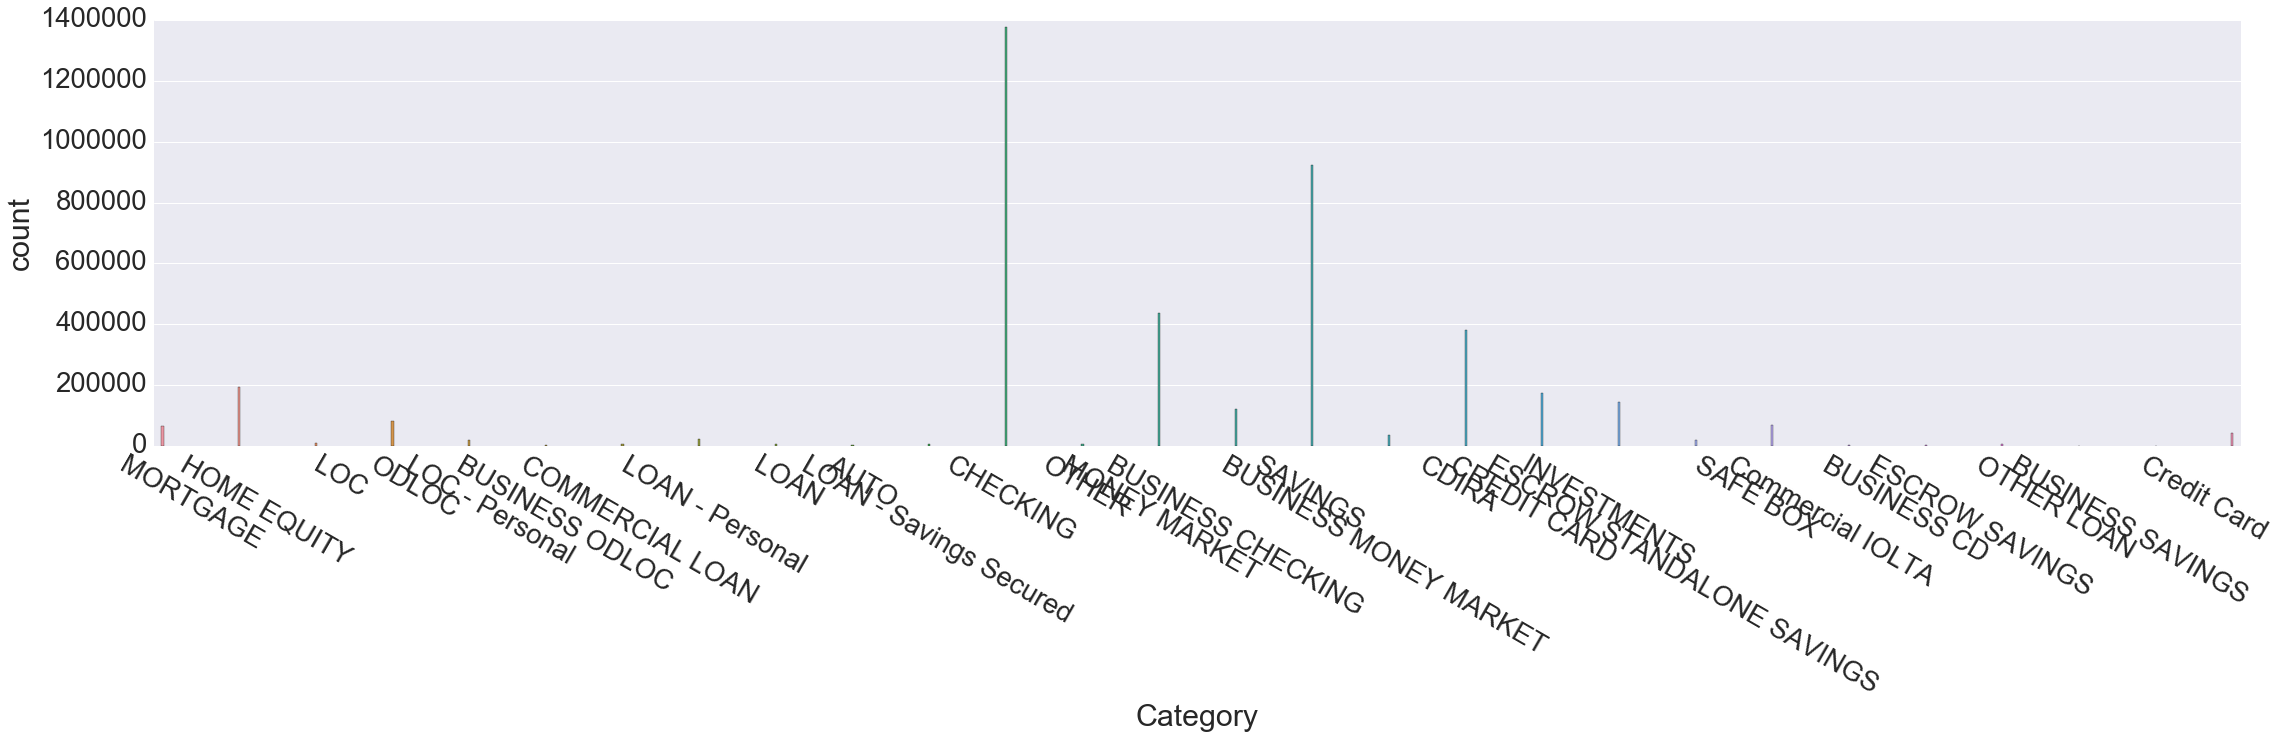

In [40]:
# get a plot of all of the categories
# checking dominates
# with sns.plotting_context(font_scale=2)

%matplotlib inline
sns.set_style("whitegrid")
sns.set(font_scale=2.75) 
p = sns.factorplot(x = 'Category', data = vintageData, kind = 'count', legend = 'True', hue = 'Category', size = 8, aspect = 4)
p.set_xticklabels(rotation=-30)

In [41]:
# one last cleanup on the channel

def clean_channel(row):
    if row == 'RED':
        return 'Branch'
    else:
        return 'OnlinePhone'

In [42]:
vintageData['Channel'] = vintageData['Channel'].apply(clean_channel)

vintageData.head()

,CostCenter,ProductType,ContractNumber,DateOpened,DateClosed,PersonType,PersonCode,Channel,Category,State,CustomerAge,CustomerStart,End_Date,Observed,CleanCustStart,CustTenure,CustYears
0,1,113,12,1989-11-29,20SEP2016,F,354668,Branch,MORTGAGE,PA,67,NaN,2016-12-15,1,NaT,NaT,nan
1,1,113,30,1996-09-30,17SEP2012,F,132166,Branch,MORTGAGE,PA,71,09/19/1996,2016-12-15,1,1996-09-19,7392 days,20
2,1,113,37,1999-03-26,14DEC2010,F,5272647,Branch,MORTGAGE,PA,56,03/19/1999,2016-12-15,1,1999-03-19,6481 days,18
3,1,113,40,2001-11-02,27DEC2007,F,131869,Branch,MORTGAGE,PA,56,NaN,2016-12-15,1,NaT,NaT,nan
4,1,113,40,2001-11-02,27DEC2007,F,1019639,Branch,MORTGAGE,PA,60,04/27/2013,2016-12-15,1,2013-04-27,1328 days,4


In [43]:
vintageData.groupby('Channel').agg({'Channel' : pd.Series.count})

,Channel
Channel,
Branch,4033858
OnlinePhone,107558


In [44]:
vintageData.dtypes

CostCenter                  int64
ProductType                 int64
ContractNumber              int64
DateOpened         datetime64[ns]
DateClosed                 object
PersonType                 object
PersonCode                  int64
Channel                    object
Category                   object
State                      object
CustomerAge                 int64
CustomerStart              object
End_Date           datetime64[ns]
Observed                    int64
CleanCustStart     datetime64[ns]
CustTenure        timedelta64[ns]
CustYears                 float64
dtype: object

In [45]:
#get a sample of the data
#x = vintageData.iloc[0,4]
#x


# calculate the customer tenure with a function
def try_convert(bad_date):
    
    try:

        return pd.to_datetime(bad_date, format='%d%b%Y')
    
    except:
        return np.nan

In [46]:
vintageData['CleanDateClosed'] = vintageData['DateClosed'].apply(try_convert)

vintageData.head(10)

,CostCenter,ProductType,ContractNumber,DateOpened,DateClosed,PersonType,PersonCode,Channel,Category,State,CustomerAge,CustomerStart,End_Date,Observed,CleanCustStart,CustTenure,CustYears,CleanDateClosed
0,1,113,12,1989-11-29,20SEP2016,F,354668,Branch,MORTGAGE,PA,67,NaN,2016-12-15,1,NaT,NaT,nan,2016-09-20
1,1,113,30,1996-09-30,17SEP2012,F,132166,Branch,MORTGAGE,PA,71,09/19/1996,2016-12-15,1,1996-09-19,7392 days,20,2012-09-17
2,1,113,37,1999-03-26,14DEC2010,F,5272647,Branch,MORTGAGE,PA,56,03/19/1999,2016-12-15,1,1999-03-19,6481 days,18,2010-12-14
3,1,113,40,2001-11-02,27DEC2007,F,131869,Branch,MORTGAGE,PA,56,NaN,2016-12-15,1,NaT,NaT,nan,2007-12-27
4,1,113,40,2001-11-02,27DEC2007,F,1019639,Branch,MORTGAGE,PA,60,04/27/2013,2016-12-15,1,2013-04-27,1328 days,4,2007-12-27
5,1,113,46,2004-06-18,24MAY2012,F,1346577,Branch,MORTGAGE,PA,67,05/02/2003,2016-12-15,1,2003-05-02,4976 days,14,2012-05-24
6,1,113,110,2003-04-30,28JAN2013,F,142009,Branch,MORTGAGE,PA,66,08/10/1994,2016-12-15,1,1994-08-10,8163 days,22,2013-01-28
7,2,103,269,1987-02-21,31DEC9999,F,132926,Branch,HOME EQUITY,PA,72,02/19/1987,2016-12-15,0,1987-02-19,10892 days,30,NaT
8,2,103,276,1987-07-29,31DEC9999,F,132913,Branch,HOME EQUITY,PA,63,07/29/1987,2016-12-15,0,1987-07-29,10732 days,29,NaT
9,2,103,285,1988-11-14,31DEC9999,F,132958,Branch,HOME EQUITY,PA,64,11/14/1988,2016-12-15,0,1988-11-14,10258 days,28,NaT


In [47]:
# calculate the duration of the product opened

vintageData['ProductTenure'] = vintageData['CleanDateClosed'] - vintageData['DateOpened']

# this works to convert days into years using the hours first
vintageData['ProductYears'] = (vintageData['ProductTenure'].astype('timedelta64[h]'))/(24*365)


In [48]:
vintageData.head(10)

,CostCenter,ProductType,ContractNumber,DateOpened,DateClosed,PersonType,PersonCode,Channel,Category,State,CustomerAge,CustomerStart,End_Date,Observed,CleanCustStart,CustTenure,CustYears,CleanDateClosed,ProductTenure,ProductYears
0,1,113,12,1989-11-29,20SEP2016,F,354668,Branch,MORTGAGE,PA,67,NaN,2016-12-15,1,NaT,NaT,nan,2016-09-20,9792 days,27
1,1,113,30,1996-09-30,17SEP2012,F,132166,Branch,MORTGAGE,PA,71,09/19/1996,2016-12-15,1,1996-09-19,7392 days,20,2012-09-17,5831 days,16
2,1,113,37,1999-03-26,14DEC2010,F,5272647,Branch,MORTGAGE,PA,56,03/19/1999,2016-12-15,1,1999-03-19,6481 days,18,2010-12-14,4281 days,12
3,1,113,40,2001-11-02,27DEC2007,F,131869,Branch,MORTGAGE,PA,56,NaN,2016-12-15,1,NaT,NaT,nan,2007-12-27,2246 days,6
4,1,113,40,2001-11-02,27DEC2007,F,1019639,Branch,MORTGAGE,PA,60,04/27/2013,2016-12-15,1,2013-04-27,1328 days,4,2007-12-27,2246 days,6
5,1,113,46,2004-06-18,24MAY2012,F,1346577,Branch,MORTGAGE,PA,67,05/02/2003,2016-12-15,1,2003-05-02,4976 days,14,2012-05-24,2897 days,8
6,1,113,110,2003-04-30,28JAN2013,F,142009,Branch,MORTGAGE,PA,66,08/10/1994,2016-12-15,1,1994-08-10,8163 days,22,2013-01-28,3561 days,10
7,2,103,269,1987-02-21,31DEC9999,F,132926,Branch,HOME EQUITY,PA,72,02/19/1987,2016-12-15,0,1987-02-19,10892 days,30,NaT,NaT,nan
8,2,103,276,1987-07-29,31DEC9999,F,132913,Branch,HOME EQUITY,PA,63,07/29/1987,2016-12-15,0,1987-07-29,10732 days,29,NaT,NaT,nan
9,2,103,285,1988-11-14,31DEC9999,F,132958,Branch,HOME EQUITY,PA,64,11/14/1988,2016-12-15,0,1988-11-14,10258 days,28,NaT,NaT,nan


In [49]:
vintageData['CustomerAge'].describe()

count   4,141,416
mean           52
std            20
min             0
25%            36
50%            53
75%            66
max           999
Name: CustomerAge, dtype: float64

In [50]:
# clean up some ages
# stop it out at 85

def set_age_limit(age):
    if float(age) > 85:
        return float(85)
    else:
        return float(age)

vintageData['Age'] = vintageData['CustomerAge'].apply(set_age_limit)

In [51]:
# after stopping out the age at 85

vintageData['Age'].describe()

count   4,141,416
mean           52
std            19
min             0
25%            36
50%            53
75%            66
max            85
Name: Age, dtype: float64

In [52]:
# check the difference in ages by channel

vintageData.groupby('Channel').agg({'CustomerAge' : pd.Series.median})


,CustomerAge
Channel,
Branch,54
OnlinePhone,40


In [53]:
# count the NaN in the Age
vintageData['Age'].isnull().sum()


0

C:\Users\n846490\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


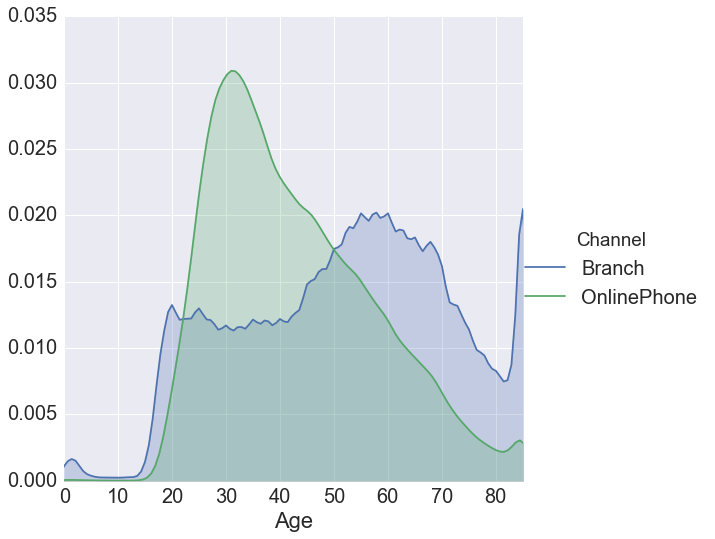

In [54]:
# get a histogram of product 
#sns.countplot(y="deck", hue="class", data=titanic, palette="Greens_d")
#fig.map(sns.kdeplot,'Age',shade=True)

# try a histogram

sns.set(font_scale=2.0)

fig = sns.FacetGrid(data=vintageData, hue='Channel', size = 8)

fig.map(sns.kdeplot,'Age', shade = True)

fig.set(xlim=(0,85))

fig.add_legend(title='Channel')


In [55]:
# cut the ages
# set the bins first
# use the generation labels

bins = [0, 18, 25, 35, 50, 100]

age_groups = ['Gen Z', 'Students', 'Millennials', 'Gen X', 'Boomers+']

vintageData['CustomerGroups'] = pd.cut(vintageData['Age'], bins, labels=age_groups)


In [56]:
vintageData.groupby('CustomerGroups').agg({'PersonCode' : pd.Series.count})

,PersonCode
CustomerGroups,
Gen Z,116366
Students,367779
Millennials,504282
Gen X,860914
Boomers+,2286449


In [57]:
# make the categorical variables for channel, category, customer group

vintageData['Channel'] = vintageData['Channel'].astype('category')

vintageData['Category'] = vintageData['Category'].astype('category')

vintageData['CustomerGroups'] = vintageData['CustomerGroups'].astype('category')


In [58]:
vintageData.dtypes

CostCenter                   int64
ProductType                  int64
ContractNumber               int64
DateOpened          datetime64[ns]
DateClosed                  object
PersonType                  object
PersonCode                   int64
Channel                   category
Category                  category
State                       object
CustomerAge                  int64
CustomerStart               object
End_Date            datetime64[ns]
Observed                     int64
CleanCustStart      datetime64[ns]
CustTenure         timedelta64[ns]
CustYears                  float64
CleanDateClosed     datetime64[ns]
ProductTenure      timedelta64[ns]
ProductYears               float64
Age                        float64
CustomerGroups            category
dtype: object

In [59]:
# add a column for account status
def acct_status(date):
    if pd.isnull(date):
        return 0
    else:
        return 1

In [60]:
vintageData['Closed'] = vintageData['CleanDateClosed'].apply(acct_status)

In [61]:
# get  view of open and closed accounts
# output is number of distinct customers that closed accounts

vintageData.groupby('Closed').agg({'PersonCode' : pd.Series.nunique})


,PersonCode
Closed,
0,826424
1,594498


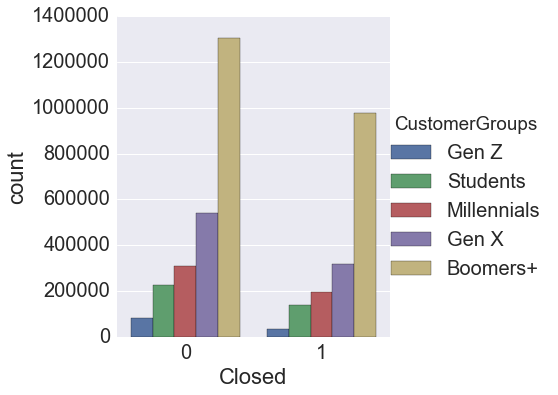

In [62]:
p = sns.factorplot(x = 'Closed', data = vintageData, kind = 'count', legend = 'True', hue = 'CustomerGroups', size = 6)

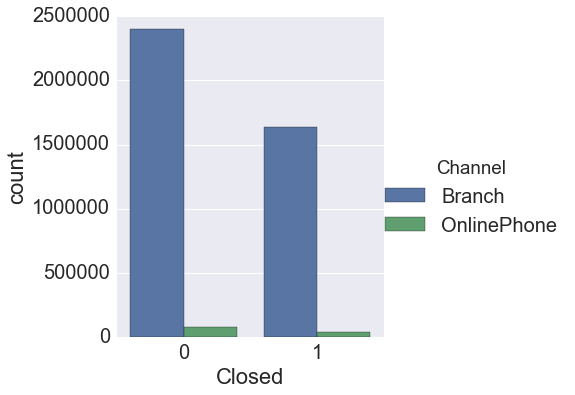

In [63]:
p = sns.factorplot(x = 'Closed', data = vintageData, kind = 'count', legend = 'True', hue = 'Channel', size = 6)

In [64]:
vintageData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4141416 entries, 0 to 4142168
Data columns (total 23 columns):
CostCenter         int64
ProductType        int64
ContractNumber     int64
DateOpened         datetime64[ns]
DateClosed         object
PersonType         object
PersonCode         int64
Channel            category
Category           category
State              object
CustomerAge        int64
CustomerStart      object
End_Date           datetime64[ns]
Observed           int64
CleanCustStart     datetime64[ns]
CustTenure         timedelta64[ns]
CustYears          float64
CleanDateClosed    datetime64[ns]
ProductTenure      timedelta64[ns]
ProductYears       float64
Age                float64
CustomerGroups     category
Closed             int64
dtypes: category(3), datetime64[ns](4), float64(3), int64(7), object(4), timedelta64[ns](2)
memory usage: 675.4+ MB


In [65]:
# create a clean data set and export it

cleanVintage = vintageData.iloc[:,[3,5,6,7,8,9,12,13,14,16,17,19,20,21,22]]

In [66]:
cleanVintage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4141416 entries, 0 to 4142168
Data columns (total 15 columns):
DateOpened         datetime64[ns]
PersonType         object
PersonCode         int64
Channel            category
Category           category
State              object
End_Date           datetime64[ns]
Observed           int64
CleanCustStart     datetime64[ns]
CustYears          float64
CleanDateClosed    datetime64[ns]
ProductYears       float64
Age                float64
CustomerGroups     category
Closed             int64
dtypes: category(3), datetime64[ns](4), float64(3), int64(3), object(2)
memory usage: 422.6+ MB


In [67]:
# check for CustYears if any are online
os.getcwd()

# export the clean data
#cleanVintage.to_csv('VintageDataClean.csv')

'C:\\Users\\n846490\\Documents\\Python Scripts\\SurvivalAnalysis'

In [68]:
# start looking at the checking

checkingData = cleanVintage.loc[vintageData.Category == 'CHECKING', :]
checkingData.head()


,DateOpened,PersonType,PersonCode,Channel,Category,State,End_Date,Observed,CleanCustStart,CustYears,CleanDateClosed,ProductYears,Age,CustomerGroups,Closed
337,1980-12-15,F,132789,Branch,CHECKING,PA,2016-12-15,0,1980-12-15,36,NaT,nan,61,Boomers+,0
338,1980-12-18,F,132793,Branch,CHECKING,PA,2016-12-15,0,1980-12-18,36,NaT,nan,85,Boomers+,0
339,1980-12-26,F,132800,Branch,CHECKING,PA,2016-12-15,0,1980-12-26,36,NaT,nan,78,Boomers+,0
340,1980-12-27,F,132894,Branch,CHECKING,PA,2016-12-15,1,1980-12-27,36,2013-08-05,33,50,Gen X,1
341,1981-01-05,F,132899,Branch,CHECKING,PA,2016-12-15,1,1989-07-11,27,2011-07-07,31,73,Boomers+,1


In [69]:
checkingData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1378745 entries, 337 to 4141722
Data columns (total 15 columns):
DateOpened         1375457 non-null datetime64[ns]
PersonType         1378745 non-null object
PersonCode         1378745 non-null int64
Channel            1378745 non-null category
Category           1378745 non-null category
State              1316345 non-null object
End_Date           1378745 non-null datetime64[ns]
Observed           1378745 non-null int64
CleanCustStart     1324552 non-null datetime64[ns]
CustYears          1324552 non-null float64
CleanDateClosed    474526 non-null datetime64[ns]
ProductYears       471238 non-null float64
Age                1378745 non-null float64
CustomerGroups     1374945 non-null category
Closed             1378745 non-null int64
dtypes: category(3), datetime64[ns](4), float64(3), int64(3), object(2)
memory usage: 140.7+ MB


In [ ]:
#export the clean checking data

# export the clean data
# checkingData.to_csv('VintageDataChecking.csv')

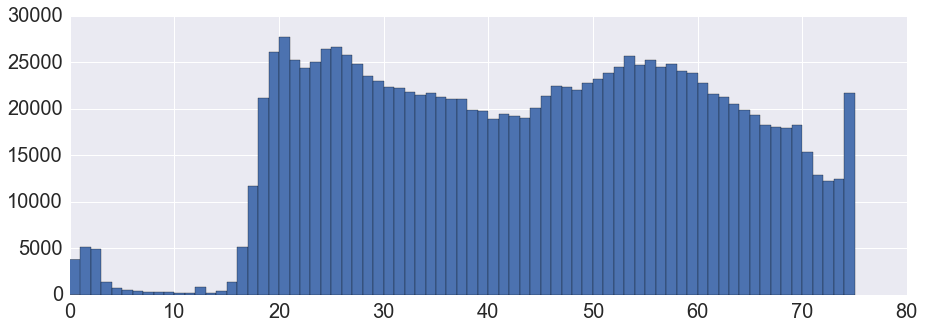

In [70]:
checkingData['Age'].hist(bins=75, range = [0,75], align = 'mid', figsize=(15,5))

C:\Users\n846490\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


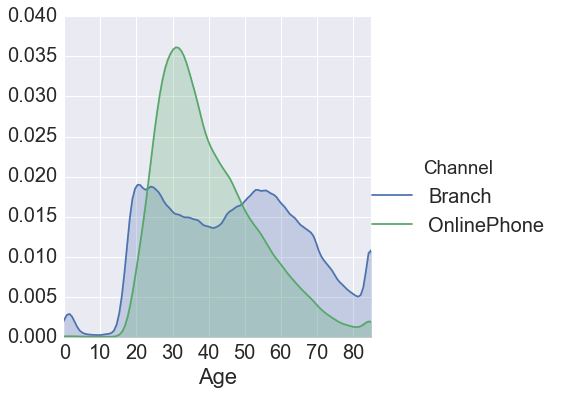

In [71]:

sns.set(font_scale=2.0)

fig = sns.FacetGrid(data=checkingData, hue='Channel', size = 6)

fig.map(sns.kdeplot,'Age', shade = True)

fig.set(xlim=(0,85))

fig.add_legend(title='Channel')

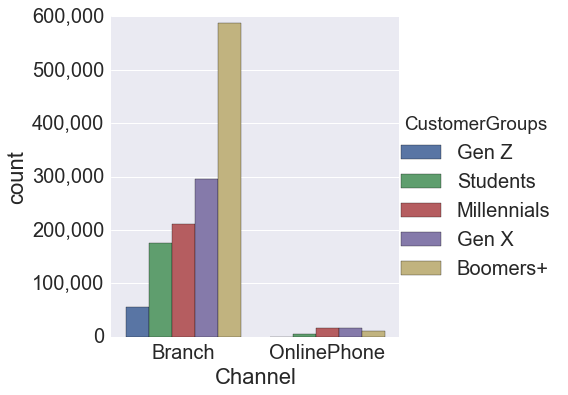

In [72]:
# make a clean plot of the checking data by channel and PersonType
# use the command below to get the properties
# looking for get_major_formatter
# dir(p.ax.get_xaxis())

import matplotlib.ticker as tkr

# formatter function takes tick label and tick position
def func(x, pos):
   s = '{:,.0f}'.format(float(x))
   return s

# make formatter
y_format = tkr.FuncFormatter(func)


# now make the plot
p = sns.factorplot(x = 'Channel', data = checkingData, kind = 'count', hue='CustomerGroups', size = 6)

# apply the formatter
p.ax.yaxis.set_major_formatter(y_format)



In [73]:
# get the checking opened during the online window
# first create a mask

mask = (checkingData['DateOpened'] > '2013-12-31')

newChecking = checkingData.loc[mask]

In [74]:
newChecking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 780594 entries, 1051 to 4141722
Data columns (total 15 columns):
DateOpened         780594 non-null datetime64[ns]
PersonType         780594 non-null object
PersonCode         780594 non-null int64
Channel            780594 non-null category
Category           780594 non-null category
State              721861 non-null object
End_Date           780594 non-null datetime64[ns]
Observed           780594 non-null int64
CleanCustStart     768322 non-null datetime64[ns]
CustYears          768322 non-null float64
CleanDateClosed    236611 non-null datetime64[ns]
ProductYears       236611 non-null float64
Age                780594 non-null float64
CustomerGroups     776810 non-null category
Closed             780594 non-null int64
dtypes: category(3), datetime64[ns](4), float64(3), int64(3), object(2)
memory usage: 79.7+ MB


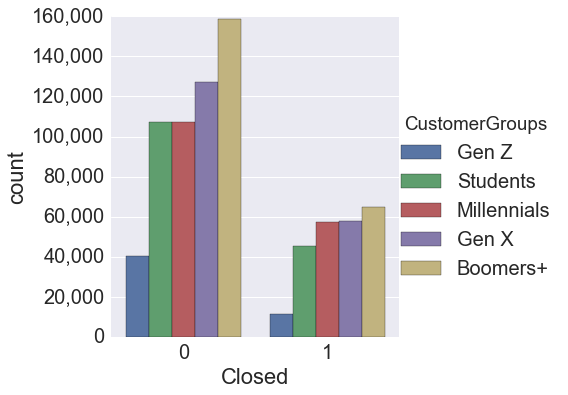

In [75]:
# look at the checking data for closed by age group
p = sns.factorplot(x = 'Closed', data = newChecking, kind = 'count', legend = 'True', hue = 'CustomerGroups', size = 6)

# apply the formatter
p.ax.yaxis.set_major_formatter(y_format)

In [76]:
# pivot the data to make it wide

# encoding categorical data
cols_to_transform = ['Category']
wideData = pd.get_dummies(data = cleanVintage, columns = cols_to_transform)


In [77]:
wideData.head()

,DateOpened,PersonType,PersonCode,Channel,State,End_Date,Observed,CleanCustStart,CustYears,CleanDateClosed,...,Category_LOAN - Savings Secured,Category_LOC,Category_LOC - Personal,Category_MONEY MARKET,Category_MORTGAGE,Category_ODLOC,Category_OTHER,Category_OTHER LOAN,Category_SAFE BOX,Category_SAVINGS
0,1989-11-29,F,354668,Branch,PA,2016-12-15,1,NaT,nan,2016-09-20,...,0,0,0,0,1,0,0,0,0,0
1,1996-09-30,F,132166,Branch,PA,2016-12-15,1,1996-09-19,20,2012-09-17,...,0,0,0,0,1,0,0,0,0,0
2,1999-03-26,F,5272647,Branch,PA,2016-12-15,1,1999-03-19,18,2010-12-14,...,0,0,0,0,1,0,0,0,0,0
3,2001-11-02,F,131869,Branch,PA,2016-12-15,1,NaT,nan,2007-12-27,...,0,0,0,0,1,0,0,0,0,0
4,2001-11-02,F,1019639,Branch,PA,2016-12-15,1,2013-04-27,4,2007-12-27,...,0,0,0,0,1,0,0,0,0,0


In [78]:
wideData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4141416 entries, 0 to 4142168
Data columns (total 42 columns):
DateOpened                            datetime64[ns]
PersonType                            object
PersonCode                            int64
Channel                               category
State                                 object
End_Date                              datetime64[ns]
Observed                              int64
CleanCustStart                        datetime64[ns]
CustYears                             float64
CleanDateClosed                       datetime64[ns]
ProductYears                          float64
Age                                   float64
CustomerGroups                        category
Closed                                int64
Category_AUTO                         float64
Category_BUSINESS CD                  float64
Category_BUSINESS CHECKING            float64
Category_BUSINESS MONEY MARKET        float64
Category_BUSINESS ODLOC              

In [79]:
# clean up the column names

# remove the word Category_
wideData.rename(columns=lambda x: x.replace('Category_', ''), inplace=True)

# remove the dashes
wideData.rename(columns=lambda x: x.replace(' - ', ''), inplace=True)

# change spaces to _ 
wideData.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)

# change to title case
wideData.rename(columns=lambda x: x.title(), inplace=True)

In [80]:
wideData.head()

,Dateopened,Persontype,Personcode,Channel,State,End_Date,Observed,Cleancuststart,Custyears,Cleandateclosed,...,Loansavings_Secured,Loc,Locpersonal,Money_Market,Mortgage,Odloc,Other,Other_Loan,Safe_Box,Savings
0,1989-11-29,F,354668,Branch,PA,2016-12-15,1,NaT,nan,2016-09-20,...,0,0,0,0,1,0,0,0,0,0
1,1996-09-30,F,132166,Branch,PA,2016-12-15,1,1996-09-19,20,2012-09-17,...,0,0,0,0,1,0,0,0,0,0
2,1999-03-26,F,5272647,Branch,PA,2016-12-15,1,1999-03-19,18,2010-12-14,...,0,0,0,0,1,0,0,0,0,0
3,2001-11-02,F,131869,Branch,PA,2016-12-15,1,NaT,nan,2007-12-27,...,0,0,0,0,1,0,0,0,0,0
4,2001-11-02,F,1019639,Branch,PA,2016-12-15,1,2013-04-27,4,2007-12-27,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
# write this to a csv for additional cleaning
# export the clean data

wideData.to_csv('wideDataforRollup.csv')

In [81]:
# reduce the dimensions to key data
# need to combine in chunks op = df[list(df.columns[0:899]) + list(df.columns[3593:])]

wideRed = wideData[list(wideData.columns[1:3]) + list(wideData.columns[12:41])]

In [82]:
# just need the person type and code and the products
# then aggregate by person type and code

wideRed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4141416 entries, 0 to 4142168
Data columns (total 33 columns):
Persontype                   object
Personcode                   int64
Customergroups               category
Closed                       int64
Auto                         float64
Business_Cd                  float64
Business_Checking            float64
Business_Money_Market        float64
Business_Odloc               float64
Business_Savings             float64
Cdira                        float64
Checking                     float64
Commercial_Loan              float64
Credit_Card                  float64
Credit_Card                  float64
Commercial_Iolta             float64
Credit_Card                  float64
Credit_Card                  float64
Escrow_Savings               float64
Escrow_Standalone_Savings    float64
Home_Equity                  float64
Investments                  float64
Loan                         float64
Loanpersonal                 float64
Loa

In [ ]:
# convert personcode to a string

wideRed['PersonCode'] = wideRed.applymap(str).iloc[:,1]

In [ ]:
# perform the aggregation
groupedWide = wideRed.groupby(['Persontype', 'Personcode'], as_index = False).sum()


In [ ]:
groupedWide.info()

In [ ]:
# now sum across
groupedWide['NumAccount'] = groupedWide.iloc[:, 2:].sum(axis = 1)

In [ ]:
groupedWide.head(10)